In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(context="talk")
sns.set_theme(context="talk", style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
!cat mountain.csv

Size,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
128m,5432,3258,2432,1975,1688,1466,1293,1172,1091,1033,979,933,898,872,856
64m,5276,3236,2462,2049,1751,1525,1355,1237,1157,1099,1039,993,961,937,919
32m,6036,3659,2760,2241,1920,1693,1506,1396,1308,1270,1236,1228,1324,1375,1485
16m,13659,7907,5603,4533,3770,3258,2882,2588,2494,2572,2640,2713,2695,2774,2817
8m,22854,12646,8611,6502,5245,4410,3796,3318,3198,3084,3009,2931,2884,2854,2838
4m,24074,13433,8953,6723,5377,4536,3850,3370,3241,3134,3086,2972,2940,2921,2913
2m,24186,13503,8985,6749,5398,4500,3864,3379,3288,3280,3418,3610,4047,4573,5213
1024k,28037,21377,18583,16295,14105,12169,10678,9323,10929,12573,15035,15782,15871,16461,17047
512k,29674,25275,24606,24538,23572,22200,20447,18569,18475,18292,18017,18140,17992,17748,17666
256k,29784,25759,25390,24948,24135,24471,22312,20094,19773,19964,19521,19332,19134,19046,18823
128k,29867,25935,25584,25646,25546,23764,22331,23278,19824,19608,19314,22325,18968,19136,21596
64k,29831,25817,25176,25266,25

In [4]:
df = pd.read_csv("mountain.csv")
df.head()

Size      1      2     3     4     5     6     7     8     9    10    11  \
0  128m   5432   3258  2432  1975  1688  1466  1293  1172  1091  1033   979   
1   64m   5276   3236  2462  2049  1751  1525  1355  1237  1157  1099  1039   
2   32m   6036   3659  2760  2241  1920  1693  1506  1396  1308  1270  1236   
3   16m  13659   7907  5603  4533  3770  3258  2882  2588  2494  2572  2640   
4    8m  22854  12646  8611  6502  5245  4410  3796  3318  3198  3084  3009   

     12    13    14    15  
0   933   898   872   856  
1   993   961   937   919  
2  1228  1324  1375  1485  
3  2713  2695  2774  2817  
4  2931  2884  2854  2838

In [5]:
ordered_sizes = [
    "16k",
    "32k",
    "64k",
    "128k",
    "256k",
    "512k",
    "1024k",
    "2m",
    "4m",
    "8m",
    "16m",
    "32m",
    "64m",
    "128m",
]


df = pd.melt(df, id_vars="Size", var_name="Stride", value_name="Throughput")
df["SizeCode"] = df["Size"].astype("category").cat.set_categories(ordered_sizes, ordered=True).cat.codes
df["StrideCode"] = df["Stride"].astype("category").cat.codes
df.head()

Size Stride  Throughput  SizeCode  StrideCode
0  128m      1        5432        13           0
1   64m      1        5276        12           0
2   32m      1        6036        11           0
3   16m      1       13659        10           0
4    8m      1       22854         9           0

In [6]:
# x = df["SizeCode"].unique()
# y = df["StrideCode"].unique()
# X, Y = np.meshgrid(x, y)
# Z = np.reshape(df["Throughput"].array, X.shape)

# fig = plt.figure(figsize=(10, 7))
# ax = plt.axes(projection="3d")

# ax.plot_surface(X, Y, Z)

<IPython.core.display.Javascript object>


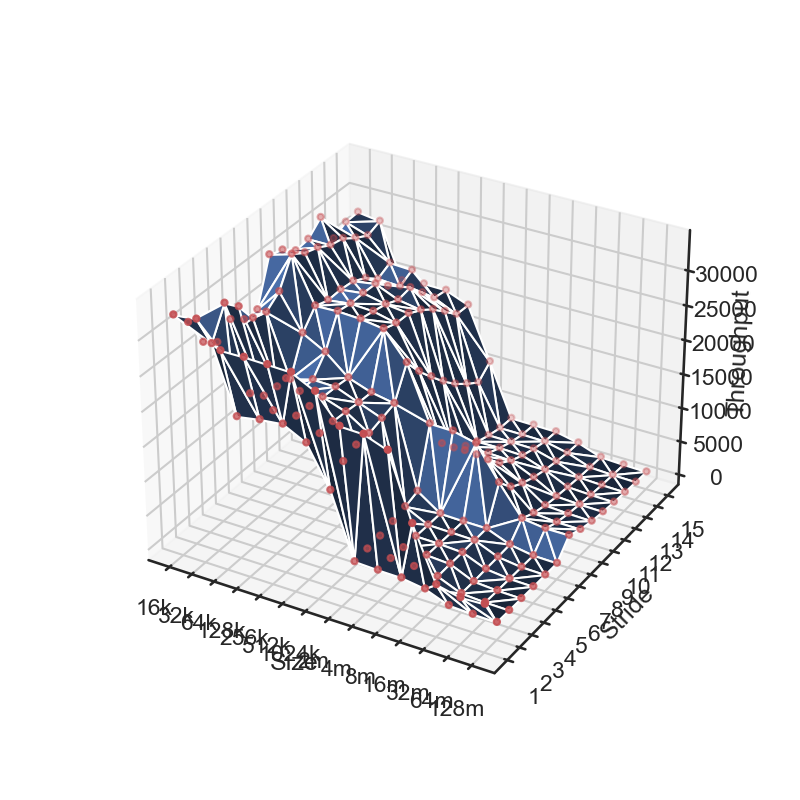

In [7]:
x = df["SizeCode"].unique()
y = df["StrideCode"].unique()
X, Y = np.meshgrid(x, y)
Z = np.reshape(df["Throughput"].array, X.shape)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")

ax.scatter(df["SizeCode"], df["StrideCode"], df["Throughput"]+100, color="r")
ax.plot_trisurf(df["SizeCode"], df["StrideCode"], df["Throughput"])

ax.set_xlabel("Size")
ax.set_xticks(range(len(ordered_sizes)))
ax.set_xticklabels(ordered_sizes)

ax.set_ylabel("Stride")
ax.set_yticks(range(15))
ax.set_yticklabels(range(1, 16))

_ = ax.set_zlabel("Throughput")

<IPython.core.display.Javascript object>


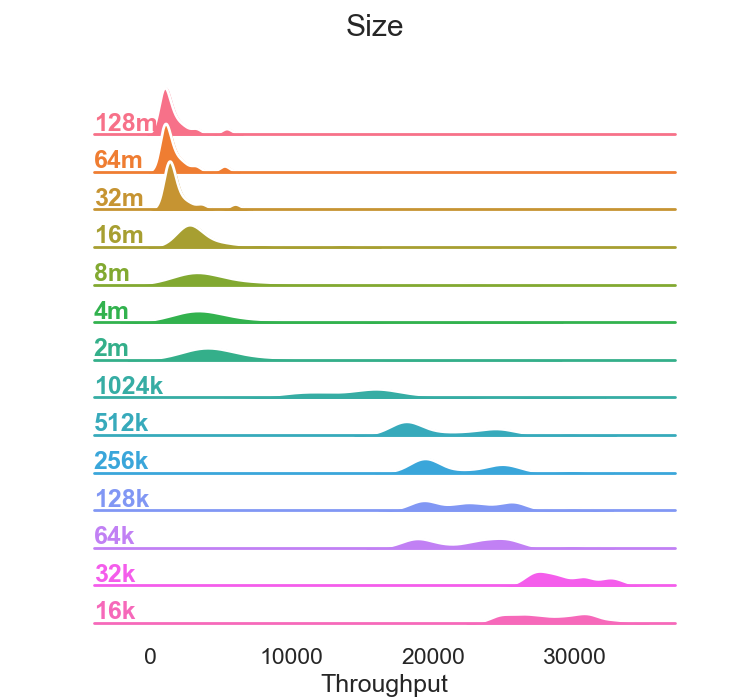

/usr/local/Caskroom/mambaforge/base/envs/ds/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/ds/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/Caskroom/mambaforge/base/envs/ds/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


In [8]:
xaxis = "Size"

g = sns.FacetGrid(df, row=xaxis, hue=xaxis, aspect=15, height=0.5)

g.map(
    sns.kdeplot,
    "Throughput",
    bw_adjust=0.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)

g.map(sns.kdeplot, "Throughput", clip_on=False, color="w", lw=2, bw_adjust=0.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "Throughput")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

_ = g.fig.suptitle(xaxis)